# Libraries import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Data Info


In [4]:
data = pd.read_csv("data_for_lr.csv")

In [5]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [6]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [8]:
data.isnull().sum()

x    0
y    1
dtype: int64

# Data Processing

In [9]:
data = data.dropna()
print("Shape of the data: ", data.shape)

Shape of the data:  (699, 2)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# Spliting Data

In [11]:
# training data
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validation data input and output 
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [12]:
print(f"training input data shape = {train_input.shape}")
print(f"training output data shape = {train_output.shape}")
print(f"test input data shape = {test_input.shape}")
print(f"test output data shape = {test_output.shape}")


training input data shape = (500, 1)
training output data shape = (500, 1)
test input data shape = (199, 1)
test output data shape = (199, 1)


# <font color = "brown">Linear Regression</font>

# Forward Propagation

 f(x) = m * x + c

In [13]:
 def forward_propagation(train_input , parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m , train_input) + c
    
    return predictions

# Cost Function

summation(1/2n * (y-f(x))^2)

In [14]:
def cost_function(predictions, train_output):
    
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    
    return cost

# Gradient Descent for Backpropagation

df = f(x) - y

dm = df * x

dc = df * 1

In [15]:
def backward_propagation(train_input, train_output, predictions):
    
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    
    return derivatives
    

# Update Parameters


m = m - (learning_rate * dm)

c = c - (learning_rate * dc)

In [16]:
def update_parameters(parameters, derivatives, learning_rate):
    
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]
    
    return parameters

# Model Training


In [21]:
def train(train_input, train_output, learning_rate, iters):
    
    #random paramters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) 
    parameters["c"] = np.random.uniform(0,1)
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iteration
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost}")
        
        #plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "*", label = "Training")
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, train_output, "*", label = "Original")
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

        
    return parameters, loss 

# Training

Iteration = 1, Loss = 862.2416771817208


<Figure size 640x480 with 0 Axes>

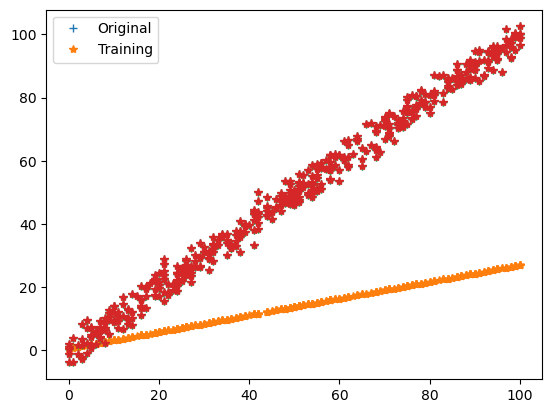

Iteration = 2, Loss = 393.37415556145464


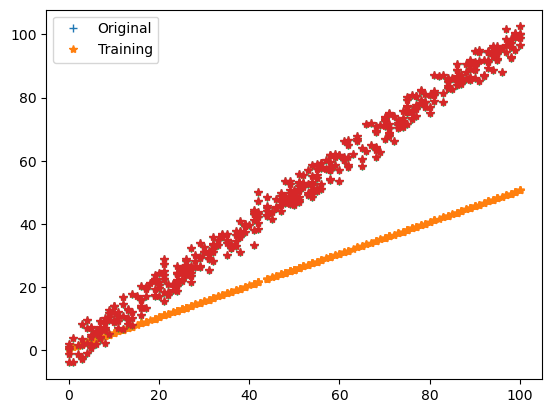

Iteration = 3, Loss = 180.6484397548873


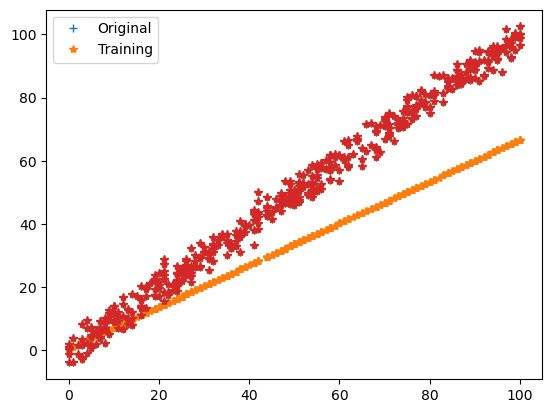

Iteration = 4, Loss = 84.13454495931207


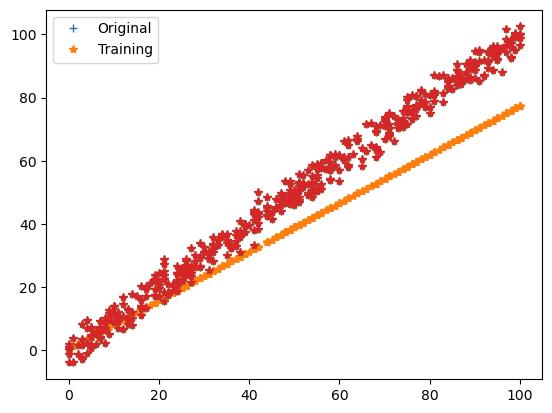

Iteration = 5, Loss = 40.34608207752272


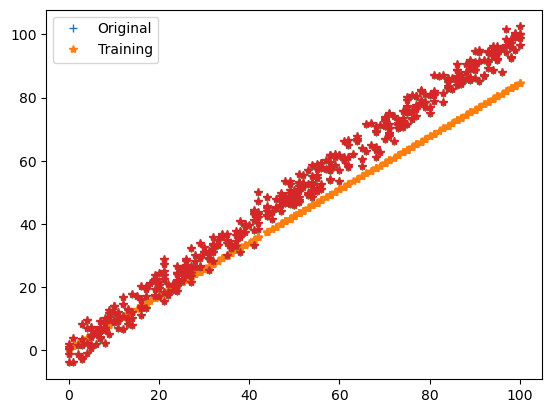

Iteration = 6, Loss = 20.479206055975748


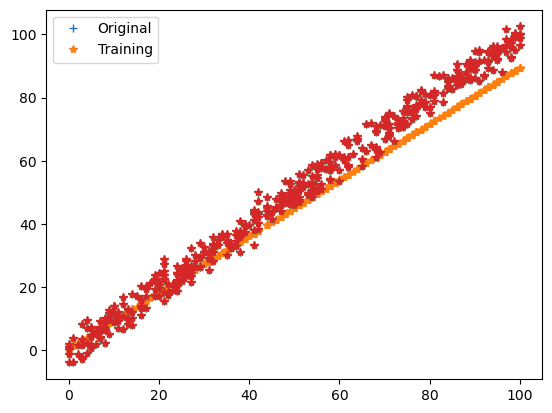

Iteration = 7, Loss = 11.465580489552423


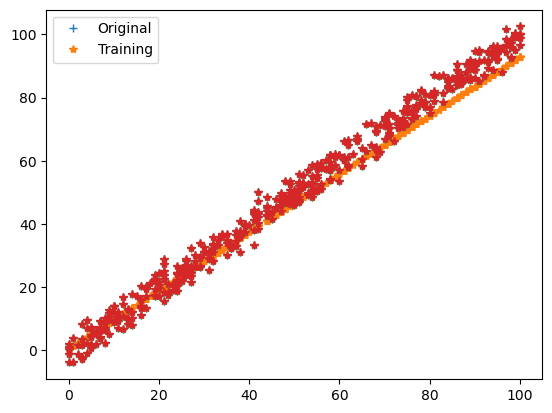

Iteration = 8, Loss = 7.376086676222426


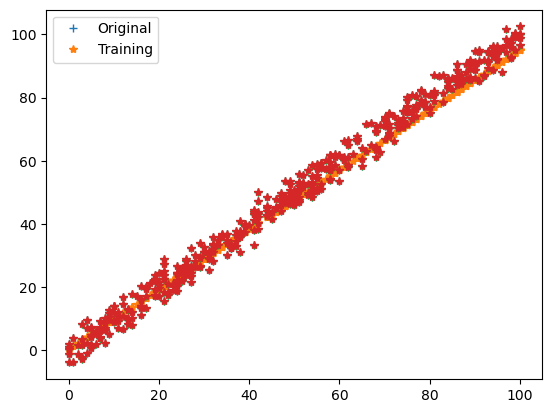

Iteration = 9, Loss = 5.520676893538368


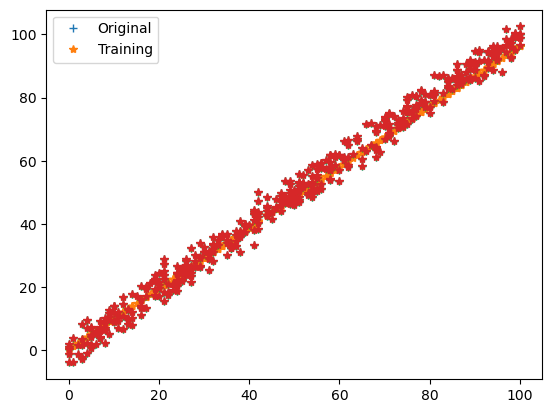

Iteration = 10, Loss = 4.67887351021812


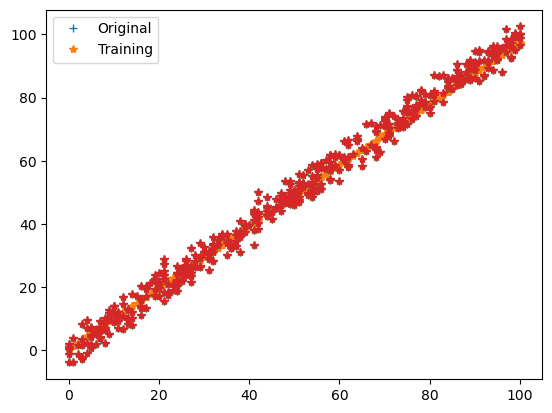

Iteration = 11, Loss = 4.29694447309765


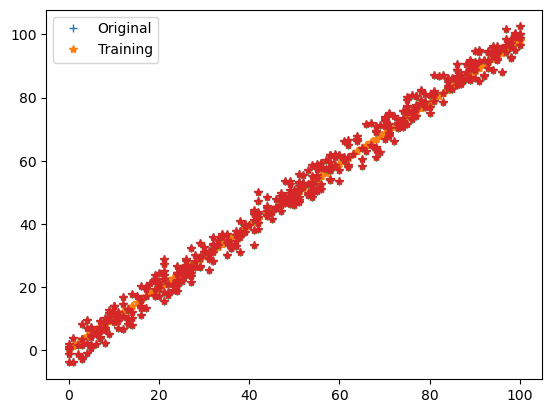

Iteration = 12, Loss = 4.123660936320011


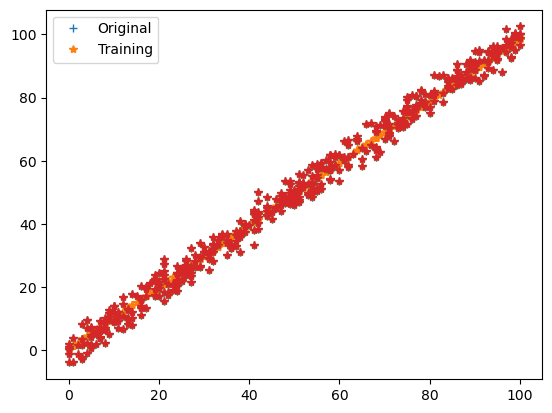

Iteration = 13, Loss = 4.045040094248457


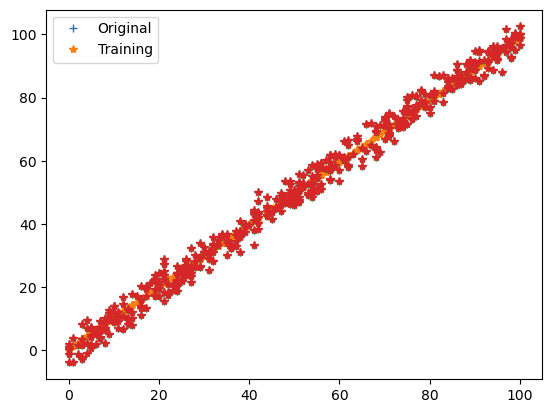

Iteration = 14, Loss = 4.009367821713541


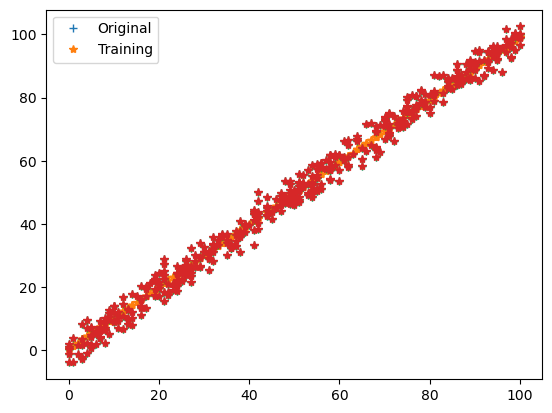

Iteration = 15, Loss = 3.993181362845189


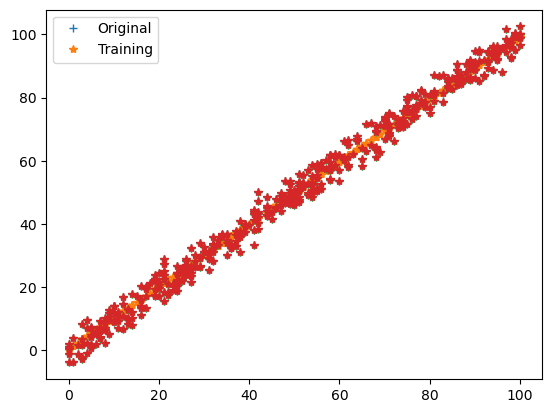

Iteration = 16, Loss = 3.985835639316826


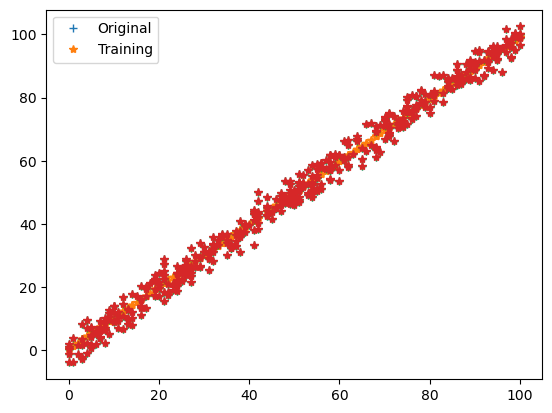

Iteration = 17, Loss = 3.9825009673007488


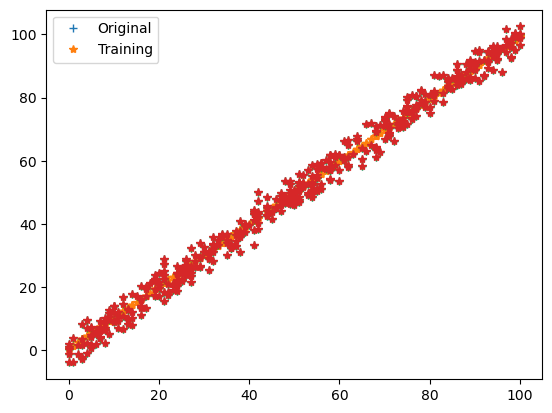

Iteration = 18, Loss = 3.9809861138947737


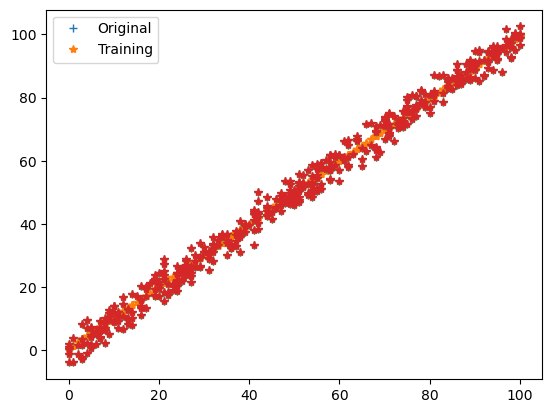

Iteration = 19, Loss = 3.98029691430407


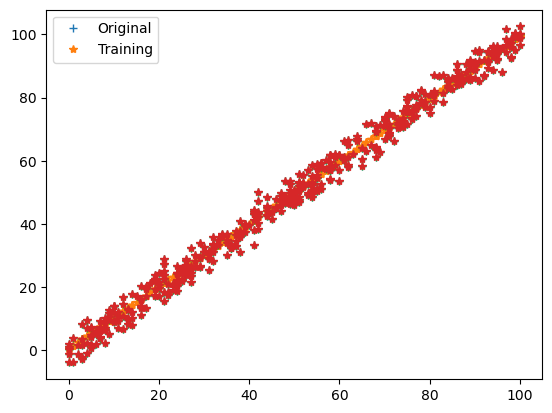

Iteration = 20, Loss = 3.979982314860042


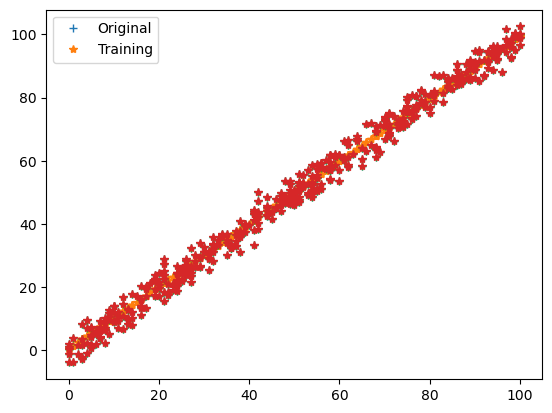

In [22]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [24]:
print(parameters)

{'m': 0.9894957747878488, 'c': 0.506009672418586}


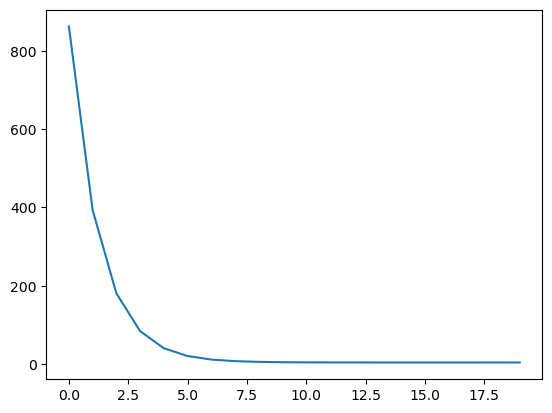

In [25]:
plt.plot(loss)

# Let's Predict

In [26]:
test_predictions = test_input * parameters['m'] + parameters['c']

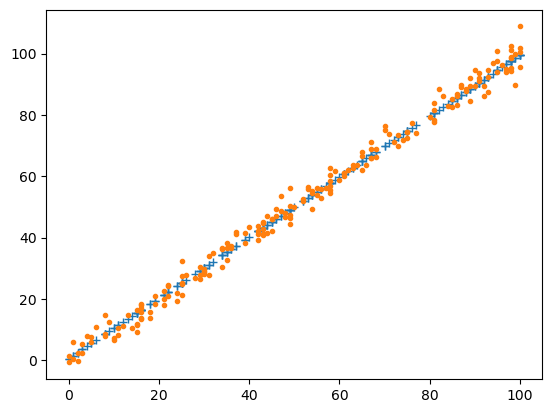

In [27]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, ".")
plt.show()

# Cost of Prediction

In [28]:
cost_function(test_output, test_predictions)

4.006864369687688